# 基础函数定义和数据加载

In [23]:
import numpy as np
import scipy.io
from time import time
from lt_msc import lt_msc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import rbf_kernel
import lrr_utils as lu
from ClusteringMeasure import compute_nmi
from ClusteringMeasure import Accuracy as ac

# 加载.mat文件(这里使用进行预处理后的数据)
data = scipy.io.loadmat('./datasets/yale_mtv.mat')
X = data['X']
X = X[0]
gt = data['gt'] # gt是真实标签
print(X[0].shape)
print(X[1].shape)
print(X[2].shape)

(4096, 165)
(3304, 165)
(6750, 165)


In [24]:
num_views = len(X)
#print(X[0].min())
#print(X[1].min())
#print(X[2].min())
#print(X[0].max())
#print(X[1].max())
#print(X[2].max())
# 数据归一化
for v in range(num_views):
    X[v] = lu.normalize_data(X[v])
# 此处需保证X中的数据格式为((feature_num1,samples_num),(feature_num2,samples_num),(feature_num3,samples_num))
#print("after")
#print(X[0].min())
#print(X[1].min())
#print(X[2].min())
#print(X[0].max())
#print(X[1].max())
#print(X[2].max())
n_samples = X[0].shape[1]
X1 = X[0].reshape(n_samples,-1)
X2 = X[1].reshape(n_samples,-1)
X3 = X[2].reshape(n_samples,-1)
sigma = 1.0

#构建不同特征的亲和矩阵
affinity_matrix1 = rbf_kernel(X1, gamma=1/(2*sigma**2))
affinity_matrix2 = rbf_kernel(X2, gamma=1/(2*sigma**2))
affinity_matrix3 = rbf_kernel(X3, gamma=1/(2*sigma**2))

#基于分类标签的亲和矩阵构建函数
def affinity_matrix_process(C,af_matrix):
    affinity_matrix = af_matrix
    for i in range(n_samples):
        for j in range(n_samples):
            if C[i] != C[j]:  
                affinity_matrix[i, j] = 0
    return affinity_matrix

#叠加热力图绘制函数
def affinity_matrix_heatmap_show(af1,af2,af3):
    affinity_matrix = (af1 + af2 + af3)/3
    plt.figure(figsize=(10, 10))
    sns.heatmap(affinity_matrix, cmap='Blues_r', annot=False, cbar=False,xticklabels=50,yticklabels=50)
    plt.title("Affinity Matrix with RBF Kernel and Class Labels")
    plt.show()

#指标折线图绘制函数
def lamda_acc_nmi_show(lamda,acc,nmi):
    x = lamda
    y1 = acc
    y2 = nmi 
    plt.plot(x, y1, marker='o', linestyle='-', color='b', label='acc')
    plt.plot(x, y2, marker='v', linestyle='-', color='r', label='nmi')
    plt.xticks(x)
    plt.title("Line Plot of accuracy and NMI with different lamda")
    plt.xlabel("lamda")
    plt.legend()
    plt.show()

# 此处为使用lt_msc同时处理多视角特征，最后只会得到一个分类结果

----processing iter 1--------
----processing iter 2--------
----processing iter 3--------
----processing iter 4--------
----processing iter 5--------
----processing iter 6--------
----processing iter 7--------
----processing iter 8--------
----processing iter 9--------
----processing iter 10--------
----processing iter 11--------
----processing iter 12--------
----processing iter 13--------
----processing iter 14--------
----processing iter 15--------
----processing iter 16--------
----processing iter 17--------
----processing iter 18--------
----processing iter 19--------
----processing iter 20--------
----processing iter 21--------
----processing iter 22--------
----processing iter 23--------
----processing iter 24--------
----processing iter 25--------
----processing iter 26--------
----processing iter 27--------
----processing iter 28--------
----processing iter 29--------
----processing iter 30--------
----processing iter 31--------
----processing iter 32--------
Time: 15.92744064

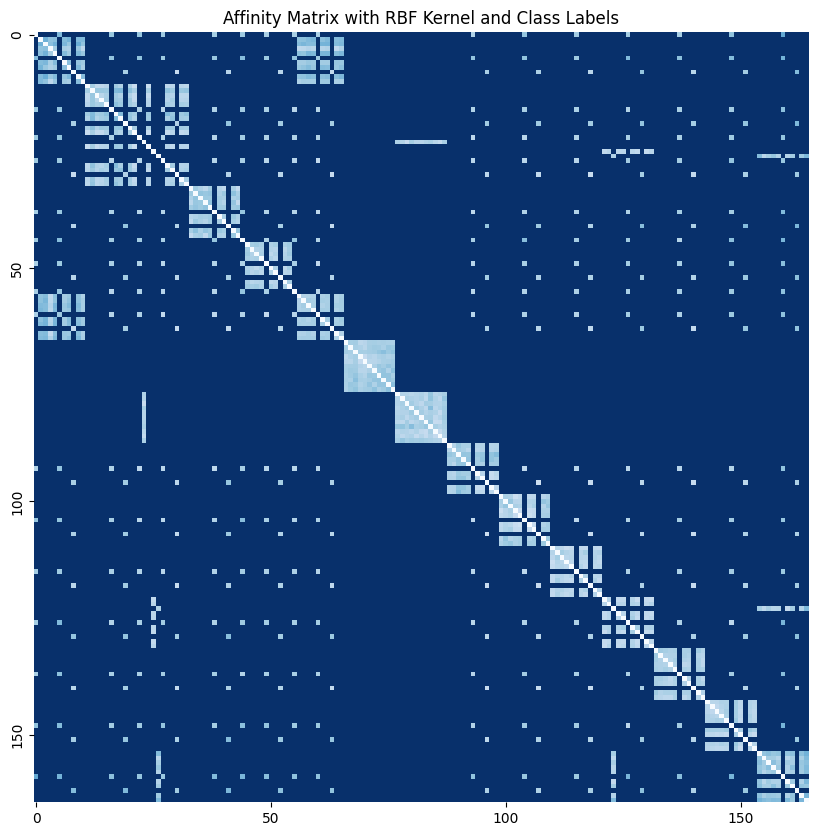

In [25]:
# lamda需要根据自己需要进行调整
lamda = 0.2
t1 = time()
nmi,acc,ar,f,p,r,C,ri= lt_msc(X,gt,lamda)
t2 = time() - t1
print(f"Time: {t2} seconds")
print(f"NMI: {nmi}")
print(f"Accuracy: {acc}")
print(f"AR: {ar}")
print(f"F-score: {f}")
print(f"pricision: {p}")
print(f"recall: {r}")
print(f"Rand Index: {ri}")
#此处的热力图是基于同一个分类标签C绘制的
affinity_matrix_heatmap_show(affinity_matrix_process(C,affinity_matrix1),affinity_matrix_process(C,affinity_matrix2),affinity_matrix_process(C,affinity_matrix3))

# 此处为使用lt_msc对每一个视角特征分别进行处理，最后只会得到一个三个特征对应的分类结果，热力图是三个不同特征的热力图的相加

----processing iter 1--------
----processing iter 2--------
----processing iter 3--------
----processing iter 4--------
----processing iter 5--------
----processing iter 6--------
----processing iter 7--------
----processing iter 8--------
----processing iter 9--------
----processing iter 10--------
----processing iter 11--------
----processing iter 12--------
----processing iter 13--------
----processing iter 14--------
----processing iter 15--------
----processing iter 16--------
----processing iter 17--------
----processing iter 18--------
----processing iter 19--------
----processing iter 20--------
----processing iter 21--------
----processing iter 22--------
----processing iter 23--------
----processing iter 24--------
----processing iter 25--------
----processing iter 26--------
----processing iter 27--------
----processing iter 28--------
----processing iter 29--------
----processing iter 30--------
----processing iter 31--------
----processing iter 1--------
----processing ite

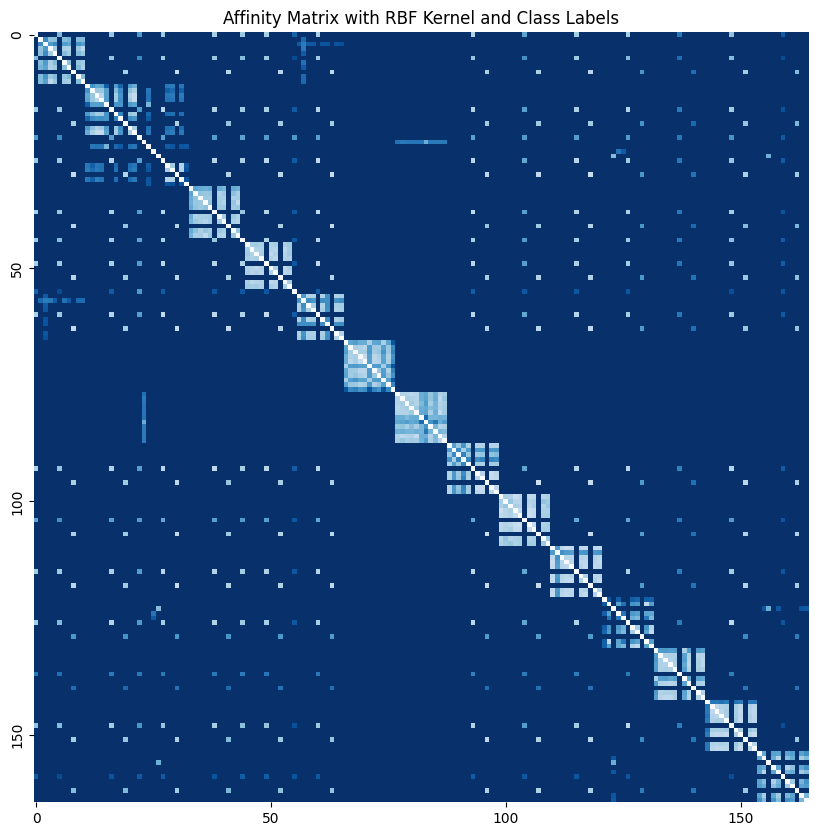

In [26]:
# lamda需要根据自己需要进行调整
lambda_ = 0.2
t1 = time()
C_list = []
for i in range(num_views):
    nmi,acc,ar,f,p,r,C,ri= lt_msc(X[i:i+1], gt, lambda_)  
    C_list.append(C)
t2 = time() - t1
affinity_matrix_heatmap_show(affinity_matrix_process(C_list[0],affinity_matrix1),affinity_matrix_process(C_list[1],affinity_matrix2),affinity_matrix_process(C_list[2],affinity_matrix3))

# 此处使用lt_msc基于不同lamda的值同时处理三个视图特征

In [27]:
#此处np.arrange的参数是(起始值，终止值，差值)
lambda_values = np.arange(0, 1, 0.1) 
acc_ltmsc = []
nmi_ltmsc = []
for i in lambda_values:
    nmi_lam,acc_lam,_,_,_,_,_,_= lt_msc(X, gt, i) 
    acc_ltmsc.append(acc_lam)
    nmi_ltmsc.append(nmi_lam)

----processing iter 1--------
----processing iter 1--------
----processing iter 2--------
----processing iter 3--------
----processing iter 4--------
----processing iter 5--------
----processing iter 6--------
----processing iter 7--------
----processing iter 8--------
----processing iter 9--------
----processing iter 10--------
----processing iter 11--------
----processing iter 12--------
----processing iter 13--------
----processing iter 14--------
----processing iter 15--------
----processing iter 16--------
----processing iter 17--------
----processing iter 18--------
----processing iter 19--------
----processing iter 20--------
----processing iter 21--------
----processing iter 22--------
----processing iter 23--------
----processing iter 24--------
----processing iter 25--------
----processing iter 26--------
----processing iter 27--------
----processing iter 28--------
----processing iter 29--------
----processing iter 30--------
----processing iter 31--------
----processing ite

# 此处是acc和nmi的可视化

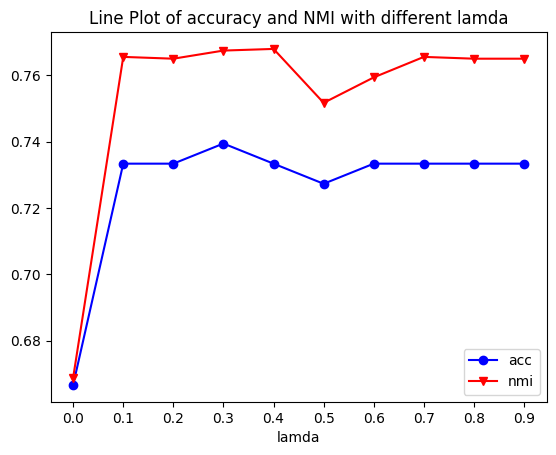

In [28]:
lamda_acc_nmi_show(lambda_values,acc_ltmsc,nmi_ltmsc)

# 此处可以获得epoch_num次的lt_msc算法的各项结果

In [29]:
#次数调节
epoch_num= 10
#lamda可以调节
lamda = 0.1
acc_list = []
nmi_list = []
ar_list = []
f_list = []
p_list = []
r_list = []
C_list = []
ri_list = []
for i in range(epoch_num):
    nmi,acc,ar,f,p,r,C,ri= lt_msc(X,gt,lamda) 
    acc_list.append(acc)
    nmi_list.append(nmi)
    ar_list.append(ar)
    f_list.append(f)
    p_list.append(p)
    r_list.append(r)
    C_list.append(C)
    ri_list.append(ri)

----processing iter 1--------
----processing iter 2--------
----processing iter 3--------
----processing iter 4--------
----processing iter 5--------
----processing iter 6--------
----processing iter 7--------
----processing iter 8--------
----processing iter 9--------
----processing iter 10--------
----processing iter 11--------
----processing iter 12--------
----processing iter 13--------
----processing iter 14--------
----processing iter 15--------
----processing iter 16--------
----processing iter 17--------
----processing iter 18--------
----processing iter 19--------
----processing iter 20--------
----processing iter 21--------
----processing iter 22--------
----processing iter 23--------
----processing iter 24--------
----processing iter 25--------
----processing iter 26--------
----processing iter 27--------
----processing iter 28--------
----processing iter 29--------
----processing iter 30--------
----processing iter 31--------
----processing iter 1--------
----processing ite

# 此处可以获得不同结果的均值和波动范围

In [30]:
result_list = [np.mean(np.array(nmi_list)),np.mean(np.array(acc_list)),np.mean(np.array(ar_list)),np.mean(np.array(f_list)),np.mean(np.array(p_list)),np.mean(np.array(r_list))]
result_range = [(np.max(np.array(nmi_list))-np.min(np.array(nmi_list)))/2,
                (np.max(np.array(acc_list))-np.min(np.array(acc_list)))/2,
                (np.max(np.array(ar_list))-np.min(np.array(ar_list)))/2,
                (np.max(np.array(f_list))-np.min(np.array(f_list)))/2,
                (np.max(np.array(p_list))-np.min(np.array(p_list)))/2,
                (np.max(np.array(r_list))-np.min(np.array(r_list)))/2,]

In [31]:
print("result:",result_list)
print("range",result_range)

result: [0.7662197475305652, 0.7363636363636363, 0.5973163479369328, 0.6227022773649448, 0.6023840182021466, 0.6444848484848485]
range [0.00685704415876387, 0.00303030303030305, 0.011799961887570765, 0.010838123374112163, 0.015399034208660067, 0.008484848484848484]


# 这里是LRR算法的结果获取与展示

In [32]:
data_lrr = scipy.io.loadmat('./datasets/yale_mtv.mat')
X_lrr = data_lrr["X"]
X1_lrr = X_lrr[0,0]
X2_lrr = X_lrr[0,1]
X3_lrr = X_lrr[0,2]
gt = data_lrr['gt'].flatten()
cls_num = len(np.unique(gt))
X_list = {0: X1_lrr, 1: X2_lrr, 2: X3_lrr}  
for v in range(3):
    X_list[v] = lu.normalize_data(X_list[v])

In [33]:
def lrr(X_list,lamda,gt):
    sigma = 1.0  
    acc_lrr = []
    nmi_lrr = []
    af_lrr = []
    for i in range(len(X_list)):
        affinity_matrixi = rbf_kernel(X_list[i].T,gamma = 1/(2 * sigma ** 2))
        
        #这里可以使用四种不同的lrr
        Z, E = lu.inexact_alm_lrr_l21(X_list[i],X_list[i],lamda,display = 0)
        #Z,E = lu.inexact_alm_lrr_l21v2(X_list[i],X_list[i],lamda,display = 0)
        #Z,E = lu.inexact_alm_lrr_l1(X_list[i],X_list[i],lamda,display = 0)
        #Z,E = lu.inexact_alm_lrr_l1v2(X_list[i],X_list[i],lamda,display = 0)
        A = 0.5 * (np.abs(Z) + np.abs(Z.T))
        labels = lu.spectral_clustering(A,cls_num)
        af = affinity_matrix_process(labels,affinity_matrixi)
        acc = ac(gt, labels)
        _,nmi,_= compute_nmi(gt.reshape(-1),labels)
        acc_lrr.append(acc)
        af_lrr.append(af)
        nmi_lrr.append(nmi)
    return acc_lrr,nmi_lrr,af_lrr

# 这里可以根据需要调整lamda的值
acc_lrr,nmi_lrr,af_lrr = lrr(X_list,1.5,gt)

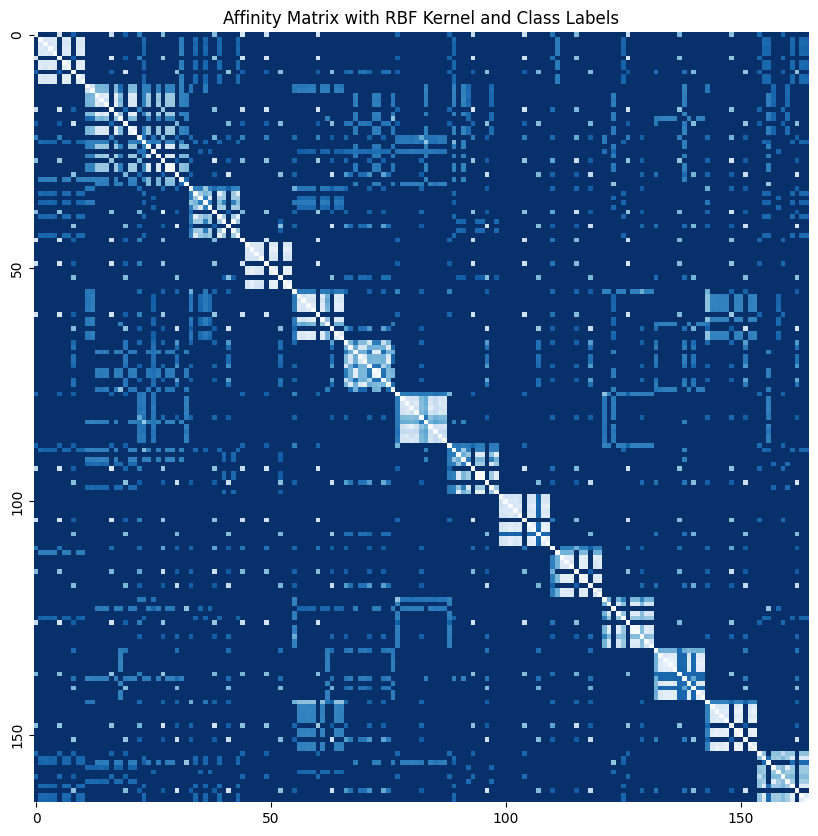

[0.6848484848484848, 0.6666666666666666, 0.703030303030303]
[0.6990298324365993, 0.6942660611799453, 0.702840207497107]


In [34]:
affinity_matrix_heatmap_show(af_lrr[0],af_lrr[1],af_lrr[2])
print(acc_lrr)
print(nmi_lrr)